## データ分析前準備

In [1]:
# ライブラリ読み込み（データ準備で使用）
import numpy as np
import pandas as pd
import IPython as ipy
from pandas import DataFrame
pd.options.display.max_rows = 101
pd.options.display.max_columns = 40

# ライブラリ読み込み（データ可視化で使用）
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #seaborneのグラフレイアウト

# ライブラリ読み込み（モデル評価で使用）
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 環境依存定数
import os
import sys
HOME_DIR = '/Users/ryoma.uehara/PycharmProjects/InfoNear'

# アプリ定数
PYSRC_DIR = os.path.join(HOME_DIR, 'py')
DATA_DIR = os.path.join(HOME_DIR, 'data/wine_quality')
EVAL_DIR = os.path.join(HOME_DIR, 'eval')

# 共通スクリプト呼び出し用にパスを通す
sys.path.append(PYSRC_DIR)

# dataフォルダに移動
os.chdir(DATA_DIR)

from glob import glob
glob('./*')


['./winequality-red.csv', './winequality.names', './winequality-white.csv']

## データ数件確認

In [2]:
# データ数件確認
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 今回のワイン品質NG演習では、品質（quality）が「3」のものを異常としたいため目的変数を以下の様にする
- 品質（quality）が「3」を異常（target=1）
- それ以外を正常（target=0）


In [3]:
def cvt_target(x):
    if x == 3:
        return 1
    return 0

df['target'] = df['quality'].map(cvt_target)
df.target.value_counts()

0    1589
1      10
Name: target, dtype: int64

#### ワイン品質NG演習のデータは、カテゴリカル変数のデータがないため、追加しておく（汎用的なEDAロジック生成のため）

In [4]:
def cvt_alcohol(x):
    if x > 5:
        return 'High'
    return 'Low'

df['alcohol_kb'] = df['quality'].map(cvt_alcohol)
df.alcohol_kb.value_counts()

High    855
Low     744
Name: alcohol_kb, dtype: int64

#### EDAロジック読み込み

In [5]:
from eda.table_overview import TableOverview
from eda.categorical_target_cross_plot import CategoricalTargetCrossPlot
from eda.categorical_target_cross_display import CategoricalTargetCrossDisplay


## テーブル概要把握

### データ量

In [6]:
tov = TableOverview(df)
tov.disp_data_volume()

,COL_CNT,ROW_CNT
0,14,1599


### テーブル定義

TODO:　Number型（離散値）のユニーク数対応  → intならUNIQUE、TOP、FREQを求める

In [7]:
tov.disp_table_info()

,TYPE,COUNT,NULL_CNT,NULL_RATE,MEAN,STD,MIN,25%,50%,75%,MAX,UNIQUE,TOP,FREQ
fixed acidity,float64,1599,0,0.0,8.31964,1.7411,4.6,7.1,7.9,9.2,15.9,NaN,NaN,NaN
volatile acidity,float64,1599,0,0.0,0.527821,0.17906,0.12,0.39,0.52,0.64,1.58,NaN,NaN,NaN
citric acid,float64,1599,0,0.0,0.270976,0.194801,0,0.09,0.26,0.42,1,NaN,NaN,NaN
residual sugar,float64,1599,0,0.0,2.53881,1.40993,0.9,1.9,2.2,2.6,15.5,NaN,NaN,NaN
chlorides,float64,1599,0,0.0,0.0874665,0.0470653,0.012,0.07,0.079,0.09,0.611,NaN,NaN,NaN
free sulfur dioxide,float64,1599,0,0.0,15.8749,10.4602,1,7,14,21,72,NaN,NaN,NaN
total sulfur dioxide,float64,1599,0,0.0,46.4678,32.8953,6,22,38,62,289,NaN,NaN,NaN
density,float64,1599,0,0.0,0.996747,0.00188733,0.99007,0.9956,0.99675,0.997835,1.00369,NaN,NaN,NaN
pH,float64,1599,0,0.0,3.31111,0.154386,2.74,3.21,3.31,3.4,4.01,NaN,NaN,NaN
sulphates,float64,1599,0,0.0,0.658149,0.169507,0.33,0.55,0.62,0.73,2,NaN,NaN,NaN


## 目的変数別に分布の確認


### 各変数とのクロス集計（件数と件数割合で２つ集計）
縦軸：カテゴリ  
横軸：ブラックリストラベル（０：正常／１：不正）  
　値：件数 or 件数割合
  
---
#### 補足 
- 実数値の場合、10区間（bin=10）に区切って集計

In [8]:
ctcd = CategoricalTargetCrossDisplay()
ctcd.plot(df, tar_col='target')

---------- Categorical Variable(alcohol_kb) vs Target Count----------


target,0,1,All
alcohol_kb,,,
High,855,0,855
Low,734,10,744
All,1589,10,1599


---------- Categorical Variable(alcohol_kb) vs Target Normalize----------


target,0,1,All
alcohol_kb,,,
High,0.534709,0.000000,0.534709
Low,0.459037,0.006254,0.465291
All,0.993746,0.006254,1.000000








---------- Numerical Variable(fixed acidity) vs Target Count----------


/Users/ryoma.uehara/PycharmProjects/InfoNear/py/eda/categorical_target_cross_display.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df[col] = s1


target,0,1,All
fixed acidity,,,
"(4.589, 5.73]",45,0,45
"(5.73, 6.86]",227,2,229
"(6.86, 7.99]",538,4,542
"(7.99, 9.12]",370,1,371
"(9.12, 10.25]",188,0,188
"(10.25, 11.38]",108,2,110
"(11.38, 12.51]",75,1,76
"(12.51, 13.64]",26,0,26
"(13.64, 14.77]",5,0,5


---------- Numerical Variable(fixed acidity) vs Target Normalize----------


target,0,1,All
fixed acidity,,,
"(4.589, 5.73]",0.028143,0.000000,0.028143
"(5.73, 6.86]",0.141964,0.001251,0.143215
"(6.86, 7.99]",0.336460,0.002502,0.338962
"(7.99, 9.12]",0.231395,0.000625,0.232020
"(9.12, 10.25]",0.117573,0.000000,0.117573
"(10.25, 11.38]",0.067542,0.001251,0.068793
"(11.38, 12.51]",0.046904,0.000625,0.047530
"(12.51, 13.64]",0.016260,0.000000,0.016260
"(13.64, 14.77]",0.003127,0.000000,0.003127








---------- Numerical Variable(volatile acidity) vs Target Count----------


target,0,1,All
volatile acidity,,,
"(0.119, 0.266]",73,0,73
"(0.266, 0.412]",405,0,405
"(0.412, 0.558]",422,1,423
"(0.558, 0.704]",473,2,475
"(0.704, 0.85]",148,2,150
"(0.85, 0.996]",47,2,49
"(0.996, 1.142]",17,1,18
"(1.142, 1.288]",2,1,3
"(1.288, 1.434]",2,0,2


---------- Numerical Variable(volatile acidity) vs Target Normalize----------


target,0,1,All
volatile acidity,,,
"(0.119, 0.266]",0.045654,0.000000,0.045654
"(0.266, 0.412]",0.253283,0.000000,0.253283
"(0.412, 0.558]",0.263915,0.000625,0.264540
"(0.558, 0.704]",0.295810,0.001251,0.297061
"(0.704, 0.85]",0.092558,0.001251,0.093809
"(0.85, 0.996]",0.029393,0.001251,0.030644
"(0.996, 1.142]",0.010632,0.000625,0.011257
"(1.142, 1.288]",0.001251,0.000625,0.001876
"(1.288, 1.434]",0.001251,0.000000,0.001251








---------- Numerical Variable(citric acid) vs Target Count----------


target,0,1,All
citric acid,,,
"(-0.001, 0.1]",431,7,438
"(0.1, 0.2]",193,0,193
"(0.2, 0.3]",291,0,291
"(0.3, 0.4]",234,0,234
"(0.4, 0.5]",251,2,253
"(0.5, 0.6]",112,0,112
"(0.6, 0.7]",61,1,62
"(0.7, 0.8]",15,0,15
"(0.9, 1.0]",1,0,1


---------- Numerical Variable(citric acid) vs Target Normalize----------


target,0,1,All
citric acid,,,
"(-0.001, 0.1]",0.269543,0.004378,0.273921
"(0.1, 0.2]",0.120700,0.000000,0.120700
"(0.2, 0.3]",0.181989,0.000000,0.181989
"(0.3, 0.4]",0.146341,0.000000,0.146341
"(0.4, 0.5]",0.156973,0.001251,0.158224
"(0.5, 0.6]",0.070044,0.000000,0.070044
"(0.6, 0.7]",0.038149,0.000625,0.038774
"(0.7, 0.8]",0.009381,0.000000,0.009381
"(0.9, 1.0]",0.000625,0.000000,0.000625








---------- Numerical Variable(residual sugar) vs Target Count----------


target,0,1,All
residual sugar,,,
"(0.885, 2.36]",987,7,994
"(2.36, 3.82]",462,1,463
"(3.82, 5.28]",66,1,67
"(5.28, 6.74]",44,1,45
"(6.74, 8.2]",11,0,11
"(8.2, 9.66]",8,0,8
"(9.66, 11.12]",3,0,3
"(12.58, 14.04]",5,0,5
"(14.04, 15.5]",3,0,3


---------- Numerical Variable(residual sugar) vs Target Normalize----------


target,0,1,All
residual sugar,,,
"(0.885, 2.36]",0.617261,0.004378,0.621639
"(2.36, 3.82]",0.288931,0.000625,0.289556
"(3.82, 5.28]",0.041276,0.000625,0.041901
"(5.28, 6.74]",0.027517,0.000625,0.028143
"(6.74, 8.2]",0.006879,0.000000,0.006879
"(8.2, 9.66]",0.005003,0.000000,0.005003
"(9.66, 11.12]",0.001876,0.000000,0.001876
"(12.58, 14.04]",0.003127,0.000000,0.003127
"(14.04, 15.5]",0.001876,0.000000,0.001876








---------- Numerical Variable(chlorides) vs Target Count----------


target,0,1,All
chlorides,,,
"(0.0114, 0.0719]",456,1,457
"(0.0719, 0.132]",1059,5,1064
"(0.132, 0.192]",33,2,35
"(0.192, 0.252]",17,1,18
"(0.252, 0.312]",2,1,3
"(0.312, 0.371]",8,0,8
"(0.371, 0.431]",10,0,10
"(0.431, 0.491]",2,0,2
"(0.551, 0.611]",2,0,2


---------- Numerical Variable(chlorides) vs Target Normalize----------


target,0,1,All
chlorides,,,
"(0.0114, 0.0719]",0.285178,0.000625,0.285804
"(0.0719, 0.132]",0.662289,0.003127,0.665416
"(0.132, 0.192]",0.020638,0.001251,0.021889
"(0.192, 0.252]",0.010632,0.000625,0.011257
"(0.252, 0.312]",0.001251,0.000625,0.001876
"(0.312, 0.371]",0.005003,0.000000,0.005003
"(0.371, 0.431]",0.006254,0.000000,0.006254
"(0.431, 0.491]",0.001251,0.000000,0.001251
"(0.551, 0.611]",0.001251,0.000000,0.001251








---------- Numerical Variable(free sulfur dioxide) vs Target Count----------


target,0,1,All
free sulfur dioxide,,,
"(0.929, 8.1]",458,6,464
"(8.1, 15.2]",459,1,460
"(15.2, 22.3]",297,2,299
"(22.3, 29.4]",197,0,197
"(29.4, 36.5]",112,1,113
"(36.5, 43.6]",39,0,39
"(43.6, 50.7]",11,0,11
"(50.7, 57.8]",12,0,12
"(64.9, 72.0]",4,0,4


---------- Numerical Variable(free sulfur dioxide) vs Target Normalize----------


target,0,1,All
free sulfur dioxide,,,
"(0.929, 8.1]",0.286429,0.003752,0.290181
"(8.1, 15.2]",0.287054,0.000625,0.287680
"(15.2, 22.3]",0.185741,0.001251,0.186992
"(22.3, 29.4]",0.123202,0.000000,0.123202
"(29.4, 36.5]",0.070044,0.000625,0.070669
"(36.5, 43.6]",0.024390,0.000000,0.024390
"(43.6, 50.7]",0.006879,0.000000,0.006879
"(50.7, 57.8]",0.007505,0.000000,0.007505
"(64.9, 72.0]",0.002502,0.000000,0.002502








---------- Numerical Variable(total sulfur dioxide) vs Target Count----------


target,0,1,All
total sulfur dioxide,,,
"(5.717, 34.3]",723,7,730
"(34.3, 62.6]",468,3,471
"(62.6, 90.9]",221,0,221
"(90.9, 119.2]",113,0,113
"(119.2, 147.5]",52,0,52
"(147.5, 175.8]",10,0,10
"(260.7, 289.0]",2,0,2
All,1589,10,1599


---------- Numerical Variable(total sulfur dioxide) vs Target Normalize----------


target,0,1,All
total sulfur dioxide,,,
"(5.717, 34.3]",0.452158,0.004378,0.456535
"(34.3, 62.6]",0.292683,0.001876,0.294559
"(62.6, 90.9]",0.138211,0.000000,0.138211
"(90.9, 119.2]",0.070669,0.000000,0.070669
"(119.2, 147.5]",0.032520,0.000000,0.032520
"(147.5, 175.8]",0.006254,0.000000,0.006254
"(260.7, 289.0]",0.001251,0.000000,0.001251
All,0.993746,0.006254,1.000000








---------- Numerical Variable(density) vs Target Count----------


target,0,1,All
density,,,
"(0.99, 0.991]",8,0,8
"(0.991, 0.993]",27,0,27
"(0.993, 0.994]",90,0,90
"(0.994, 0.996]",248,2,250
"(0.996, 0.997]",485,2,487
"(0.997, 0.998]",446,2,448
"(0.998, 1.0]",182,3,185
"(1.0, 1.001]",73,1,74
"(1.001, 1.002]",19,0,19


---------- Numerical Variable(density) vs Target Normalize----------


target,0,1,All
density,,,
"(0.99, 0.991]",0.005003,0.000000,0.005003
"(0.991, 0.993]",0.016886,0.000000,0.016886
"(0.993, 0.994]",0.056285,0.000000,0.056285
"(0.994, 0.996]",0.155097,0.001251,0.156348
"(0.996, 0.997]",0.303315,0.001251,0.304565
"(0.997, 0.998]",0.278924,0.001251,0.280175
"(0.998, 1.0]",0.113821,0.001876,0.115697
"(1.0, 1.001]",0.045654,0.000625,0.046279
"(1.001, 1.002]",0.011882,0.000000,0.011882








---------- Numerical Variable(pH) vs Target Count----------


target,0,1,All
pH,,,
"(2.739, 2.867]",2,0,2
"(2.867, 2.994]",27,0,27
"(2.994, 3.121]",134,0,134
"(3.121, 3.248]",360,1,361
"(3.248, 3.375]",552,3,555
"(3.375, 3.502]",348,4,352
"(3.502, 3.629]",131,1,132
"(3.629, 3.756]",28,1,29
"(3.756, 3.883]",3,0,3


---------- Numerical Variable(pH) vs Target Normalize----------


target,0,1,All
pH,,,
"(2.739, 2.867]",0.001251,0.000000,0.001251
"(2.867, 2.994]",0.016886,0.000000,0.016886
"(2.994, 3.121]",0.083802,0.000000,0.083802
"(3.121, 3.248]",0.225141,0.000625,0.225766
"(3.248, 3.375]",0.345216,0.001876,0.347092
"(3.375, 3.502]",0.217636,0.002502,0.220138
"(3.502, 3.629]",0.081926,0.000625,0.082552
"(3.629, 3.756]",0.017511,0.000625,0.018136
"(3.756, 3.883]",0.001876,0.000000,0.001876








---------- Numerical Variable(sulphates) vs Target Count----------


target,0,1,All
sulphates,,,
"(0.328, 0.497]",149,2,151
"(0.497, 0.664]",848,7,855
"(0.664, 0.831]",416,0,416
"(0.831, 0.998]",117,1,118
"(0.998, 1.165]",32,0,32
"(1.165, 1.332]",15,0,15
"(1.332, 1.499]",4,0,4
"(1.499, 1.666]",4,0,4
"(1.833, 2.0]",4,0,4


---------- Numerical Variable(sulphates) vs Target Normalize----------


target,0,1,All
sulphates,,,
"(0.328, 0.497]",0.093183,0.001251,0.094434
"(0.497, 0.664]",0.530331,0.004378,0.534709
"(0.664, 0.831]",0.260163,0.000000,0.260163
"(0.831, 0.998]",0.073171,0.000625,0.073796
"(0.998, 1.165]",0.020013,0.000000,0.020013
"(1.165, 1.332]",0.009381,0.000000,0.009381
"(1.332, 1.499]",0.002502,0.000000,0.002502
"(1.499, 1.666]",0.002502,0.000000,0.002502
"(1.833, 2.0]",0.002502,0.000000,0.002502








---------- Numerical Variable(alcohol) vs Target Count----------


target,0,1,All
alcohol,,,
"(8.394, 9.05]",36,2,38
"(9.05, 9.7]",513,1,514
"(9.7, 10.35]",319,4,323
"(10.35, 11.0]",313,3,316
"(11.0, 11.65]",173,0,173
"(11.65, 12.3]",131,0,131
"(12.3, 12.95]",75,0,75
"(12.95, 13.6]",21,0,21
"(13.6, 14.25]",7,0,7


---------- Numerical Variable(alcohol) vs Target Normalize----------


target,0,1,All
alcohol,,,
"(8.394, 9.05]",0.022514,0.001251,0.023765
"(9.05, 9.7]",0.320826,0.000625,0.321451
"(9.7, 10.35]",0.199500,0.002502,0.202001
"(10.35, 11.0]",0.195747,0.001876,0.197624
"(11.0, 11.65]",0.108193,0.000000,0.108193
"(11.65, 12.3]",0.081926,0.000000,0.081926
"(12.3, 12.95]",0.046904,0.000000,0.046904
"(12.95, 13.6]",0.013133,0.000000,0.013133
"(13.6, 14.25]",0.004378,0.000000,0.004378








---------- Numerical Variable(quality) vs Target Count----------


target,0,1,All
quality,,,
3,0,10,10
4,53,0,53
5,681,0,681
6,638,0,638
7,199,0,199
8,18,0,18
All,1589,10,1599


---------- Numerical Variable(quality) vs Target Normalize----------


target,0,1,All
quality,,,
3,0.000000,0.006254,0.006254
4,0.033146,0.000000,0.033146
5,0.425891,0.000000,0.425891
6,0.398999,0.000000,0.398999
7,0.124453,0.000000,0.124453
8,0.011257,0.000000,0.011257
All,0.993746,0.006254,1.000000


#### お試しにヒートマップで可視化してみた
- 1つの枠線内に２つの図を描画、左が正規化版、右がカウント版
- 正規化版は目的変数内での割合（理由：値が偏りすぎて、すべて真っ白になってしまうため）

/Users/ryoma.uehara/PycharmProjects/InfoNear/py/eda/categorical_target_cross_plot.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df[col] = s1


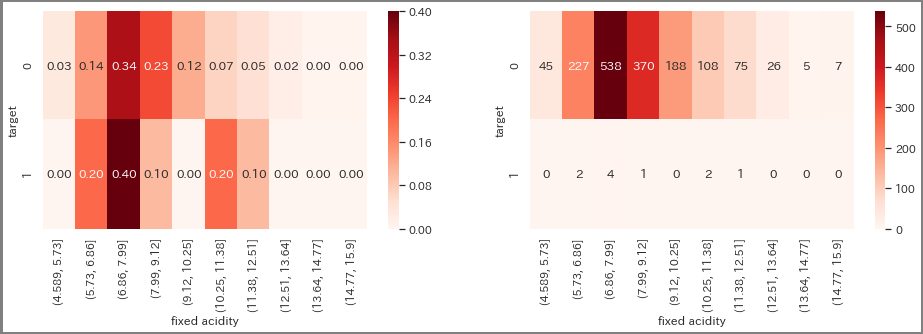

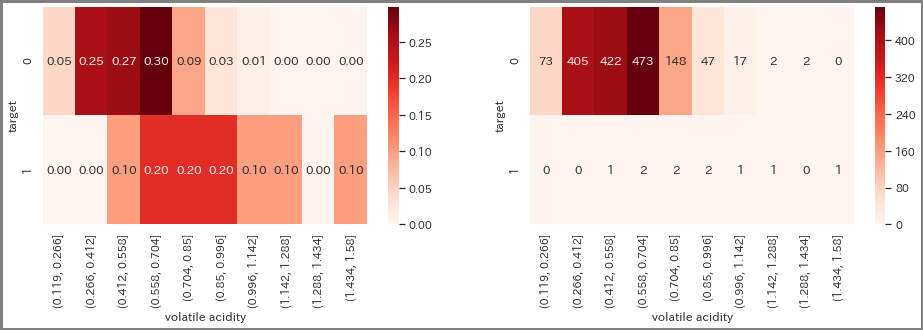

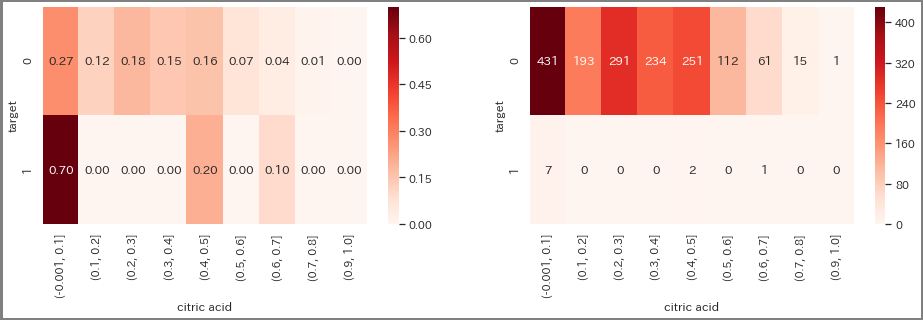

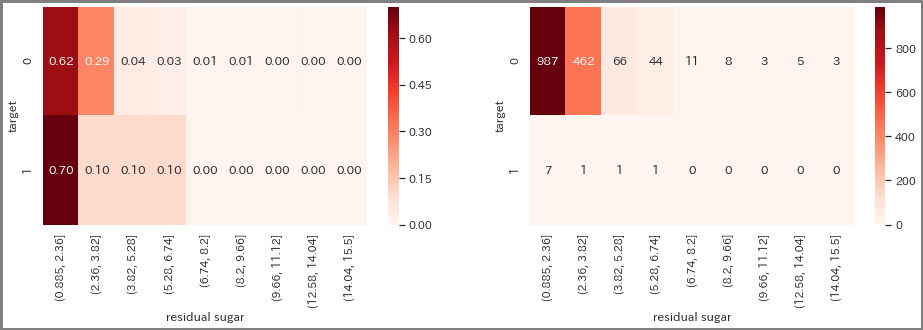

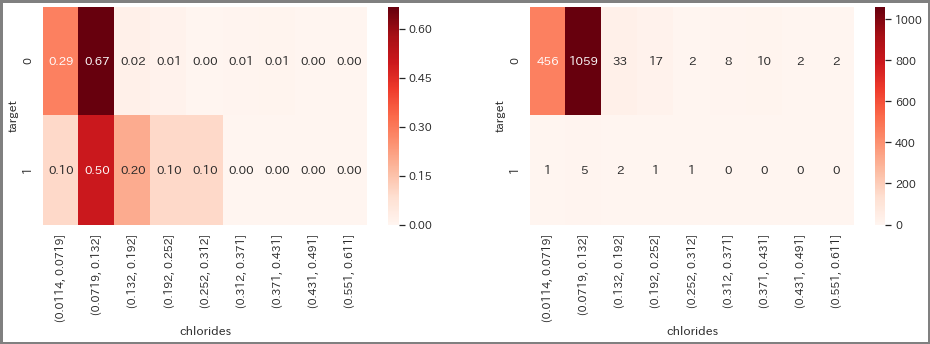

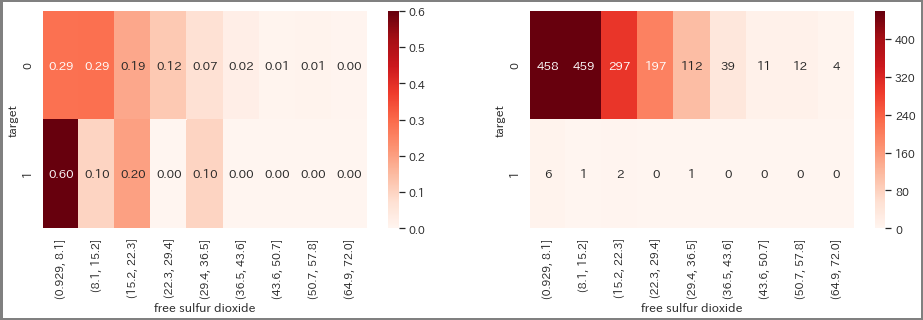

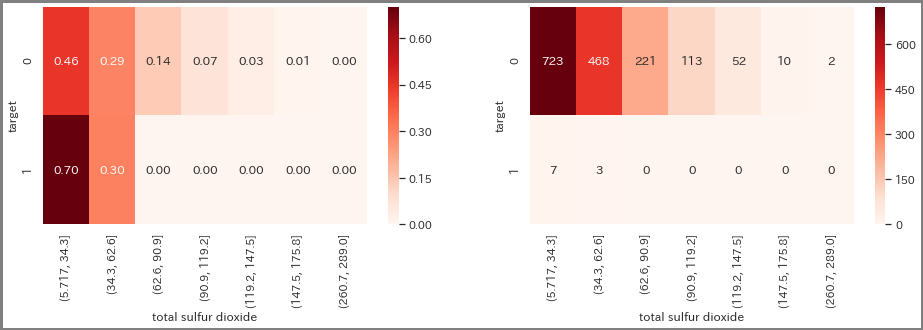

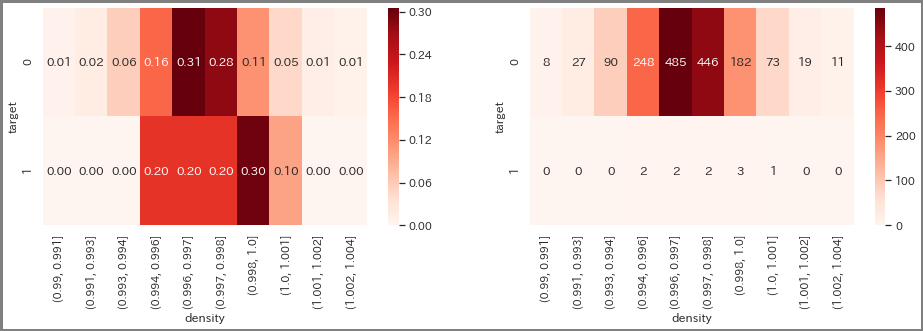

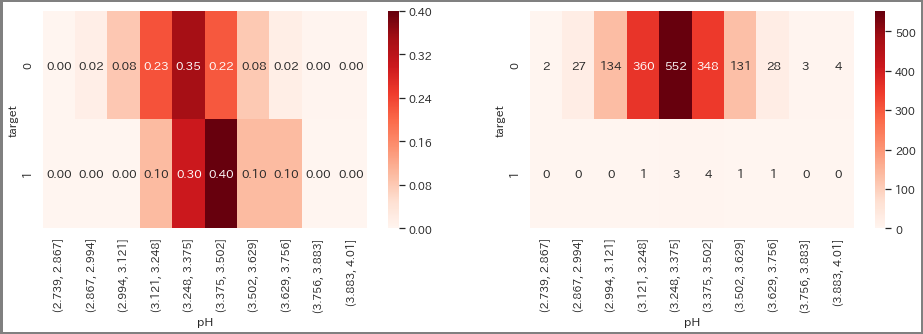

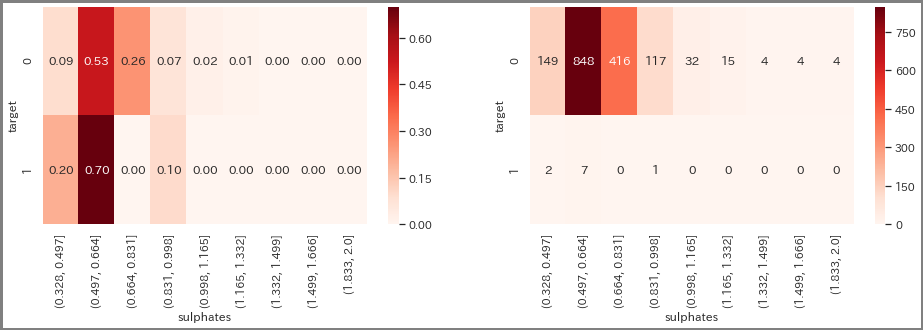

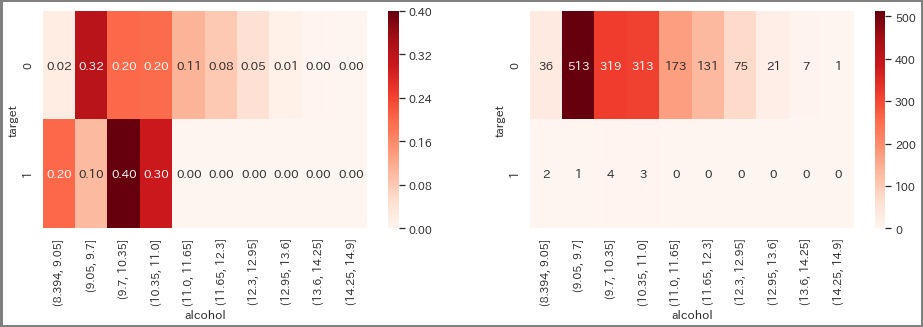

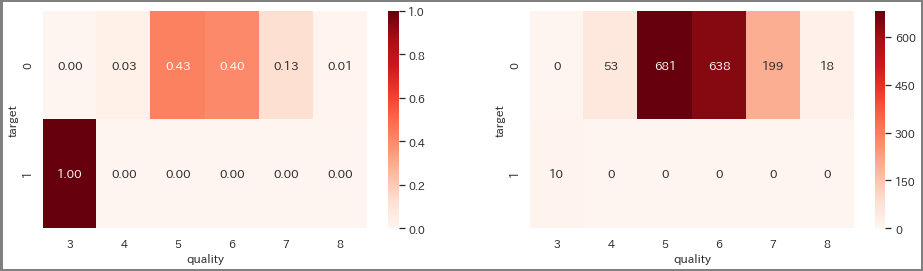

In [11]:
ctcp = CategoricalTargetCrossPlot()
ctcp.plot(df, tar_col='target')

#### 累積構成比で可視化
- 異常値が全体の何パーセントにあたるか見てみたかった

In [9]:
def plot_target_comsum(file_name, sep=',', encoding=None):
    print(f'********** {file_name}  **********')
    _df = pd.read_csv(file_name, sep=sep, encoding=encoding)
    record_cnt = len(_df)
    _df = _df.quality.value_counts().sort_index().cumsum().to_frame().rename(columns={'quality': 'COMSUM'})
    _df['COMSUM_RATE'] = _df.COMSUM / record_cnt
    display(_df)
    
    _df.COMSUM_RATE.plot()
    plt.show()
    print('\n'*2)


********** winequality-white.csv  **********


,COMSUM,COMSUM_RATE
3,20,0.004083
4,183,0.037362
5,1640,0.334831
6,3838,0.783585
7,4718,0.963250
8,4893,0.998979
9,4898,1.000000


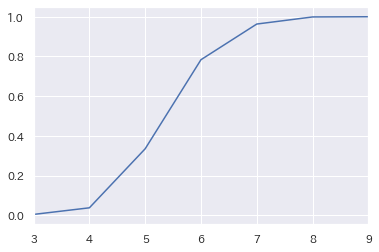




********** winequality-red.csv  **********


,COMSUM,COMSUM_RATE
3,10,0.006254
4,63,0.039400
5,744,0.465291
6,1382,0.864290
7,1581,0.988743
8,1599,1.000000


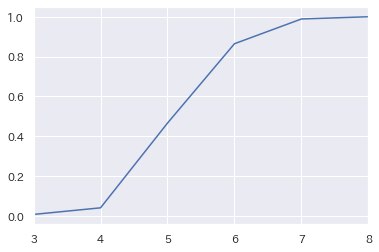

In [10]:
plot_target_comsum('winequality-white.csv', sep=';')
plot_target_comsum('winequality-red.csv', sep=';')